SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to handle imbalanced datasets in classification problems. It works by creating synthetic examples of the minority class to balance the dataset, rather than simply duplicating existing examples.

Creating synthetic examples means generating new, artificial data points that are similar to the existing examples in the minority class — rather than just copying or duplicating existing ones.

 What SMOTE Does (Simplified):

Suppose you have a dataset where:

    The majority class (e.g., "Not Fraud") has 900 examples.

    The minority class (e.g., "Fraud") has only 100 examples.

This imbalance can cause your model to ignore the minority class. SMOTE helps by creating new "Fraud" examples, but not by duplicating. Instead, it:
🧪 How Synthetic Examples Are Created:

    Choose a minority class sample.

    Find its k-nearest neighbors (other minority class samples).

    Pick one neighbor randomly.

    Generate a new sample by interpolating between the two

in smote  2 nearest coordinates we will join to make  the line and then points between them on line will get added in the dataset

This is called interpolation technique ( where new sample are generated)

In [2]:
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1,n_redundant=0)

In [4]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [5]:
x.shape 

(1000, 2)

In [6]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
import pandas as pd

In [8]:
d1= pd.DataFrame(x,columns=['f1','f2'])

In [9]:
d2= pd.DataFrame(y,columns=['target'])

In [10]:
d2 

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [11]:
final_df=pd.concat([d1,d2],axis=1) 

In [12]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

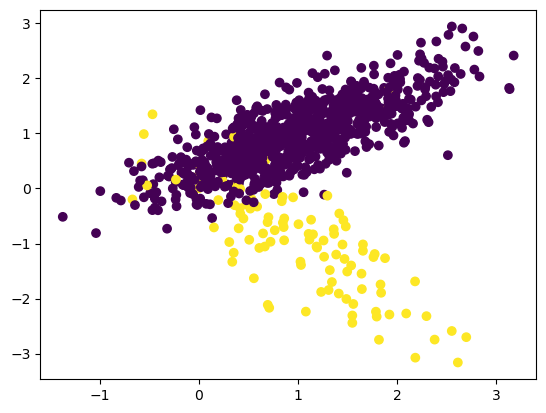

In [13]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
## transform the dataset
oversample= SMOTE()
X,Y= oversample.fit_resample(final_df[['f1','f2']],final_df['target'])


X= matrix ( array like data structure )

here x = final_df[['f1','f2']]  we did not passed only final_df complete because 

1. X contains the features (independent variables) of your dataset
2. y contains the target variable (dependent variable)


This separation is important because SMOTE needs to:
Analyze the distribution of classes in y 
Generate synthetic samples based on the features in X
Preserve the relationship between features and target


> Why not pass the entire DataFrame?
When you pass final_df['target'] separately, it allows SMOTE to:
Identify the minority class that needs oversampling
Generate synthetic samples only for the minority class
Maintain the correct relationship between features and target


returns x_sampled, y_sampled


x_sampled :- resampled independent features,

y_sampled :- resampled target features 


got 2 columns as n_features

n_classes is by default 2 so it got 0,1


if coorinates are below a particular slope or point or formula then they are assigned class 1 as minorly 



The minimum valid value for n_classes is 2 because:

With 0 classes: There's nothing to classify
With 1 class: There's no other class to compare against
With 2 classes: You have a binary classification problem (0 and 1)
So when using make_classification, you should always specify n_classes as 2 or greater. For binary classification (which is what you typically use with SMOTE), you would use:


In [16]:
X

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.821566,-0.133863
1784,0.855050,-0.700831
1785,-0.031586,0.204788
1786,0.443081,-0.944988


In [17]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [18]:
X.shape

(1788, 2)

In [19]:
Y.shape

(1788,)

In [20]:
len(Y[Y==0])

894

In [21]:
df1= pd.DataFrame(X,columns=['f1','f2'])
df2= pd.DataFrame(Y,columns=['target'])
oversample_df= pd.concat([df1,df2],axis=1)

In [22]:
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.821566,-0.133863,1
1784,0.855050,-0.700831,1
1785,-0.031586,0.204788,1
1786,0.443081,-0.944988,1


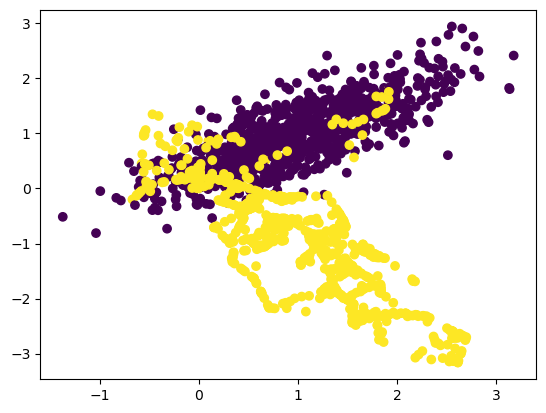

In [23]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

##### Some Notes

The `make_classification` function in the `sklearn.datasets` module is used to generate synthetic datasets for classification problems. It is particularly useful for testing and experimenting with machine learning algorithms. Here's a breakdown of the function and its parameters:

### Code in Your Notebook:
```python
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=1000,          # Total number of samples (rows) in the dataset
    n_features=2,            # Total number of features (columns) in the dataset
    n_clusters_per_class=1,  # Number of clusters per class
    weights=[0.90],          # Proportion of samples in each class (90% in one class, 10% in the other)
    random_state=1,          # Seed for reproducibility
    n_redundant=0            # Number of redundant features (linear combinations of informative features)
)
```

### Explanation of Parameters:
1. **`n_samples`**:  
   The total number of data points (rows) to generate. In your case, 1000 samples are created.

2. **`n_features`**:  
   The total number of features (columns) in the dataset. Here, you have 2 features.

3. **`n_clusters_per_class`**:  
   The number of clusters to generate per class. For example, if `n_clusters_per_class=1`, all samples of a class will form a single cluster.

   This parameter specifies how many clusters (groups) of data points should be created for each class. 

**Real-World Example:**
Imagine you're classifying fruits into two categories: apples and oranges. If `n_clusters_per_class=1`, all apples will form one cluster, and all oranges will form another cluster. However, if `n_clusters_per_class=2`, apples might form two separate clusters (e.g., red apples and green apples), and oranges might form two clusters (e.g., small oranges and large oranges).

In your code, `n_clusters_per_class=1`, so each class (0 or 1) will have a single cluster of points.


4. **`weights`**:  
   Specifies the proportion of samples in each class. In your case, `[0.90]` means 90% of the samples belong to one class (majority class), and the remaining 10% belong to the other class (minority class).

5. **`random_state`**:  
   A seed value to ensure reproducibility of the dataset. Using the same seed will generate the same dataset every time.

6. **`n_redundant`**:  
   The number of redundant features. These are linear combinations of the informative features. In your case, `n_redundant=0`, so no redundant features are added.

   This parameter specifies the number of redundant features in the dataset. Redundant features are linear combinations of the informative features, meaning they don't add new information but are derived from existing features.

**Real-World Example:**
Suppose you're predicting house prices, and you have two features:
1. `size_in_sqft` (informative feature)
2. `size_in_sq_meters` (redundant feature, as it's just a conversion of `size_in_sqft`).

If `n_redundant=1`, one of the features in your dataset will be redundant, derived from the others. In your code, `n_redundant=0`, so no redundant features are added.


### Output:
- **`x`**:  
  A NumPy array of shape `(n_samples, n_features)` containing the feature values.
  
- **`y`**:  
  A NumPy array of shape `(n_samples,)` containing the class labels (0 or 1).

### Example:
If you visualize the data using a scatter plot (as done later in your notebook), you'll see two clusters corresponding to the two classes, with one class being much larger than the other due to the imbalance specified by `weights=[0.90]`.

Let me know if you need further clarification!



### Scatter Plot: `c=final_df['target']`
In the scatter plot, the `c` parameter specifies the color of each point based on the values in `final_df['target']`. 

- **`final_df['target']`** contains the class labels (0 or 1) for each data point.
- The scatter plot assigns different colors to points based on their class, making it easier to visually distinguish between the two classes.

**Real-World Analogy:**
Imagine plotting a map of houses for sale, where:
- Houses in one price range (e.g., <$500k) are marked in blue.
- Houses in another price range (e.g., >$500k) are marked in red.

Here, the `c` parameter is like the price range, determining the color of each house on the map. Similarly, in your scatter plot, `c=final_df['target']` colors the points based on their class (0 or 1).